# Fit Sine with Lineair Regression Model

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Generate sine Data Points

In [6]:
n_points = 1024
X = np.linspace(-2*np.pi,2*np.pi,n_points)
Y = np.sin(X)+0.25*np.random.rand(n_points)-0.05
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

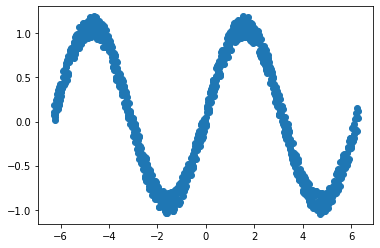

In [8]:
plt.scatter(X,Y)

## Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [10]:
def polynomial_model(degree=1):
         # degree indicates the order of the polynomial
    polynomial_features = PolynomialFeatures(degree=degree,include_bias=False)
         # normalize=True normalizes features to [0,1]
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",linear_regression)])
    return pipeline

In [11]:
degrees = [2,3,5,10]
results=[]
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(X,Y)
    train_score = model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({"model":model,"degree":d,"score":train_score,"mse":mse})
for r in results:
    print("degree: {}; train_score: {}; mean squared error: {};".format(r["degree"],r["score"],r["mse"]))

degree: 2; train_score: 0.15451234464229147; mean squared error: 0.42780832205924846;
degree: 3; train_score: 0.28534922742166824; mean squared error: 0.3616061641322629;
degree: 5; train_score: 0.8978190989195673; mean squared error: 0.05170251695659294;
degree: 10; train_score: 0.989924224228968; mean squared error: 0.005098242060348878;


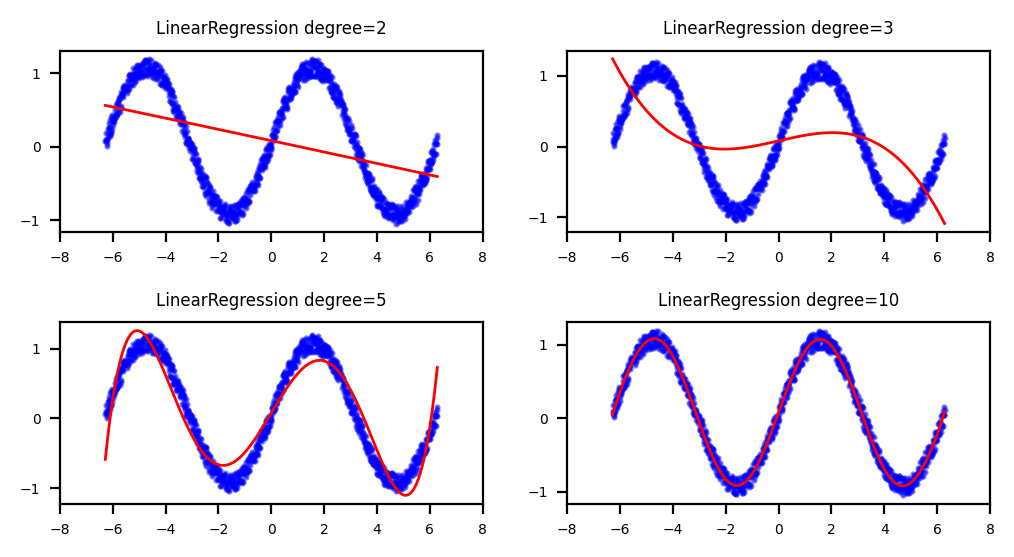

In [13]:
from matplotlib.figure import SubplotParams
 
plt.figure(figsize=(6,3),dpi=200,subplotpars=SubplotParams(hspace=0.5))
for i,r in enumerate(results):
    fig=plt.subplot(2,2,i+1)
    plt.xlim(-8,8)
    plt.title("LinearRegression degree={}".format(r["degree"]),fontsize=6)
    plt.xticks(np.linspace(-8,8,9),fontsize=5)
    plt.yticks(fontsize=5)
    plt.scatter(X,Y,s=1.5,c='b',alpha=0.5)
    plt.plot(X,r["model"].predict(X),'r-',linewidth=1)

## Draw a fitting function of the 10th order polynomial linear model in the range [-20, +20]:

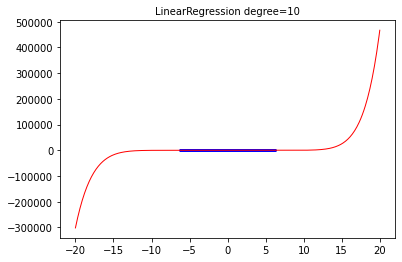

In [14]:
plt.title("LinearRegression degree={}".format(results[3]["degree"]),fontsize=10)
plt.xticks(np.linspace(-20,20,9),fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(X,Y,s=1.5,c='b',alpha=0.5)
X1=np.linspace(-20,20,400)
X1=X1.reshape(-1,1)
plt.plot(X1,results[3]["model"].predict(X1),'r-',linewidth=1)

It is shown that the fitting model has a good fitting effect on the training set only within the range of the training set, and the fitting result beyond the range of the training set cannot be used.